# Rock Paper Scissor Classification

Created by : I Gusti Bagus Awienandra
https://github.com/rainoverme002


## Import dependencies

In [0]:
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fix Error: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

print the tensorflow version

In [2]:
print(tf.__version__)

2.2.0


download the training and validation data

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip
  

--2020-05-17 15:02:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  20.7MB/s    in 17s     

2020-05-17 15:02:20 (18.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



zip extraction

In [0]:
# extract the downloaded zip file
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

create base directory

In [0]:
base_dir = '/tmp/images'

# make sure it empty
if os.path.isdir('base_dir'):
  shutil.rmtree(base_dir, ignore_errors=False, onerror=None)

# create base_dir
os.mkdir(base_dir)

# train & validation dir
os.mkdir(base_dir + '/train')
os.mkdir(base_dir + '/val')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# rock paper scissor train dir
os.mkdir(train_dir + '/rock')
os.mkdir(train_dir + '/paper')
os.mkdir(train_dir + '/scissors')

# rock paper scissor train dir
os.mkdir(validation_dir + '/rock')
os.mkdir(validation_dir + '/paper')
os.mkdir(validation_dir + '/scissors')

check directory is already created

In [6]:
os.listdir('/tmp/images/train')

['paper', 'scissors', 'rock']

In [7]:
os.listdir('/tmp/images/val')

['paper', 'scissors', 'rock']

## Split Image Randomly into validation and train directory

In [0]:
import glob
import random

def random_copy_image(directory, data_type):
  data_size = 150
  if directory == 'train': data_size = 600

  to_be_moved = random.sample(glob.glob("/tmp/rockpaperscissors/{}/*.png".format(data_type)), data_size)

  for f in enumerate(to_be_moved, 1):
      dest = os.path.join('/tmp/images/{}/{}'.format(directory, data_type))
      if not os.path.exists(dest):
          os.makedirs(dest)
      shutil.copy(f[1], dest)

In [0]:
random_copy_image('train', 'paper')
random_copy_image('train', 'rock')
random_copy_image('train', 'scissors')

random_copy_image('val', 'paper')
random_copy_image('val', 'rock')
random_copy_image('val', 'scissors')

assign directory

In [0]:
# create train directory
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissor_dir = os.path.join(train_dir, 'scissor')
 
# create validation directory
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissor_dir = os.path.join(validation_dir, 'scissor')

## Generate Image Data

In [0]:
# prepare the testing and training data using ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir, # training directory
        target_size=(150, 150),  # change the resolution into 150 x 150
        batch_size=4,
        # multi class classification class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1800 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


## Model Building using Keras

In [0]:
# create CNN architecture with Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, input_dim=4, activation='relu'),
    tf.keras.layers.Dropout(0.2), # add dropout regulatization
    tf.keras.layers.Dense(3, activation='softmax')
])

Exponential Decay Learning Rate

You can use SGD or Adam Optimizer

In [0]:
option = 'SGD' #change this one for different optimizer

if option == 'SGD':
    optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)

if option == 'Adam':
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [0]:
# call compile function
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [16]:
! pip install --user pillow # if you dont have pillow

Add Call Back

In [0]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3), # will patienly wait 3 epoch to halt the training
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

## Model Training

In [22]:
prediction_model = model.fit(
      train_generator,
      steps_per_epoch=80,  # how many batch per epoch for training
      epochs=25,
      validation_data=validation_generator, # display validation accuracy
      validation_steps=20,  # how many batch per epoch for validation
      verbose=2,
      callbacks=my_callbacks)

Epoch 1/20
80/80 - 18s - loss: 0.2979 - accuracy: 0.7750 - val_loss: 0.1577 - val_accuracy: 0.8625
Epoch 2/20
80/80 - 18s - loss: 0.1956 - accuracy: 0.8875 - val_loss: 0.1456 - val_accuracy: 0.9500
Epoch 3/20
80/80 - 18s - loss: 0.1533 - accuracy: 0.8969 - val_loss: 0.2237 - val_accuracy: 0.8500
Epoch 4/20
80/80 - 18s - loss: 0.1634 - accuracy: 0.9312 - val_loss: 0.1111 - val_accuracy: 0.9375
Epoch 5/20
80/80 - 18s - loss: 0.1279 - accuracy: 0.9312 - val_loss: 0.1490 - val_accuracy: 0.8974
Epoch 6/20
80/80 - 18s - loss: 0.1573 - accuracy: 0.9156 - val_loss: 0.1802 - val_accuracy: 0.9125
Epoch 7/20
80/80 - 18s - loss: 0.1492 - accuracy: 0.9156 - val_loss: 0.0876 - val_accuracy: 0.9125
Epoch 8/20
80/80 - 18s - loss: 0.1682 - accuracy: 0.9000 - val_loss: 0.0564 - val_accuracy: 0.9625
Epoch 9/20
80/80 - 18s - loss: 0.1307 - accuracy: 0.9219 - val_loss: 0.1034 - val_accuracy: 0.9625


## Training Summary

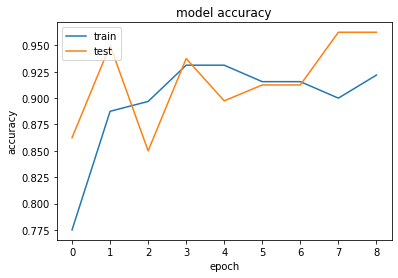

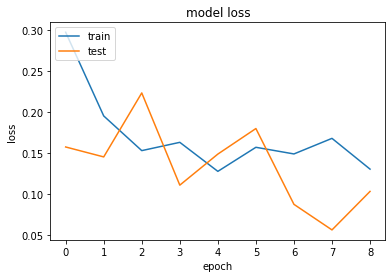

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# summarize history for accuracy
plt.plot(prediction_model.history['accuracy'])
plt.plot(prediction_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(prediction_model.history['loss'])
plt.plot(prediction_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Check Model After Training

In [0]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  plt.imshow(img)
  plt.show()

  if classes[0][0] > classes[0][1] and classes[0][0] > classes[0][2]: print('Paper')

  if classes[0][1] > classes[0][0] and classes[0][1] > classes[0][2]: print('Rock')

  if classes[0][2] > classes[0][0] and classes[0][2] > classes[0][1]: print('Scissor')

  print(classes)

## Conclusion

- Accuracy of the model is pretty high
- SGD Optimizer with current hyperparameter is done better than the Adam Optimizer